# MNIST Handwritten Digit Classification

## Building Model 

### Import Libraries 

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
import cv2

### Load the data

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

### Displaying Single Image

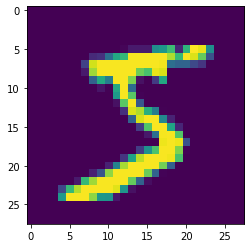

In [5]:
single_image = x_train[0]
plt.imshow(single_image)

In [6]:
single_image.shape

(28, 28)

In [7]:
# its prediction
y_train[0]

5

## Data Scaling

In [8]:
x_train.min(),x_train.max()

(0, 255)

In [9]:
x_train = x_train/255
x_test = x_test/255

In [10]:
x_train.min(),x_train.max()

(0.0, 1.0)

## Reshape Data

In [11]:
x_train = x_train.reshape(60000, 28, 28,1)
x_test = x_test.reshape(10000, 28, 28,1)

## Building Model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [25]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=64,kernel_size=(4,4),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=128,activation='relu'))

# OUTPUT LAYER SOFTMAX --> MULTI CLASS PROBLEM
model.add(Dense(units=10,activation='softmax'))

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=False, reduction="auto", name="sparse_categorical_crossentropy"
),metrics=['accuracy'])

## Model Training

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [27]:
model.fit(x_train,y_train,epochs=10,
          validation_data=(x_test,y_test),
         callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 55s 28ms/step - loss: 0.2884 - accuracy: 0.9121 - val_loss: 0.0401 - val_accuracy: 0.9874
Epoch 2/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0422 - accuracy: 0.9866 - val_loss: 0.0307 - val_accuracy: 0.9896
Epoch 3/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0266 - accuracy: 0.9919 - val_loss: 0.0259 - val_accuracy: 0.9922
Epoch 4/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0188 - accuracy: 0.9939 - val_loss: 0.0250 - val_accuracy: 0.9923
Epoch 5/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0134 - accuracy: 0.9959 - val_loss: 0.0367 - val_accuracy: 0.9890


## Model Evaluation

In [16]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0482 - accuracy: 0.9836


[0.0482134185731411, 0.9836000204086304]

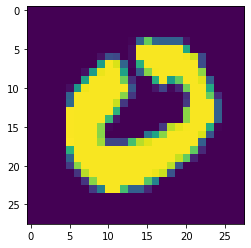

In [17]:
my_num = x_test[25]
plt.imshow(my_num.reshape(28,28))

In [18]:
prediction = np.argmax(model.predict(my_num.reshape(1,28,28,1)), axis=-1)
print('Number is:',prediction[0])

Number is: 0


## Training Model on Complete Dataset

In [100]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [101]:
X = np.concatenate((x_train,x_test))
y = np.concatenate((y_train,y_test))

In [102]:
X = X/255
X = X.reshape(70000, 28, 28,1)

In [103]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=64,kernel_size=(4,4),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=128,activation='relu'))

# OUTPUT LAYER SOFTMAX --> MULTI CLASS PROBLEM
model.add(Dense(units=10,activation='softmax'))

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=False, reduction="auto", name="sparse_categorical_crossentropy"
),metrics=['accuracy'])

In [104]:
model.fit(X,y,epochs=5)

Epoch 1/5
2188/2188 [==============================] - 40s 16ms/step - loss: 0.2769 - accuracy: 0.9122
Epoch 2/5
2188/2188 [==============================] - 35s 16ms/step - loss: 0.0408 - accuracy: 0.98730s - loss: 0.0408 - accuracy: 0.98
Epoch 3/5
2188/2188 [==============================] - 38s 17ms/step - loss: 0.0265 - accuracy: 0.9919
Epoch 4/5
2188/2188 [==============================] - 39s 18ms/step - loss: 0.0190 - accuracy: 0.9931
Epoch 5/5
2188/2188 [==============================] - 39s 18ms/step - loss: 0.0141 - accuracy: 0.9956


### Plotting Accuracy/Loss

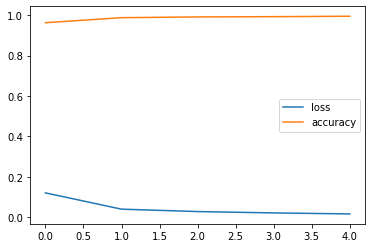

In [108]:
eval = pd.DataFrame(model.history.history)
eval.plot()

### Saving Model

In [109]:
model.save('mnist-model.h5')